In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions # 데이터 사이언스 작업라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [35]:
# 전처리

df = pd.read_csv('./knn_data/diagnosis.csv')
print(df.sample(5))

df = df.drop(["id"], axis = 1)
print(df['diagnosis'].unique())

df["diagnosis"] = df['diagnosis'].map({"M" : 0, "B":1})

print("\n\n 전처리1단계 : \n ", df)

X_data = df[["radius_mean",  "texture_mean",  "perimeter_mean",  "area_mean"]]
Y_data = df["diagnosis"]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
286  8912909         B       11.940         20.76           77.87      441.0
137   868682         B       11.430         15.39           73.06      399.8
459  9112712         B        9.755         28.20           61.68      290.9
173   871641         B       11.080         14.71           70.21      372.7
122   865423         M       24.250         20.20          166.20     1761.0
['M' 'B']


 전처리1단계 : 
       diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
0            0        17.99         10.38          122.80     1001.0
1            0        20.57         17.77          132.90     1326.0
2            0        19.69         21.25          130.00     1203.0
3            0        11.42         20.38           77.58      386.1
4            0        20.29         14.34          135.10     1297.0
..         ...          ...           ...             ...        ...
564          0        21.56   

455
[0.11403509 0.14035088 0.09649123 0.11403509 0.11403509 0.12280702
 0.13157895 0.12280702 0.12280702 0.14035088 0.13157895 0.13157895
 0.13157895 0.13157895 0.12280702 0.13157895 0.12280702 0.12280702
 0.13157895 0.12280702 0.12280702 0.12280702 0.11403509 0.11403509
 0.11403509 0.12280702 0.12280702 0.13157895 0.13157895 0.13157895
 0.13157895 0.13157895 0.13157895 0.13157895 0.13157895 0.14035088
 0.13157895 0.13157895 0.12280702 0.14035088 0.12280702 0.14035088
 0.11403509 0.11403509 0.11403509 0.12280702 0.11403509 0.13157895
 0.10526316 0.11403509 0.10526316 0.11403509 0.10526316 0.12280702
 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509
 0.11403509 0.11403509 0.11403509 0.12280702 0.11403509 0.11403509
 0.12280702 0.12280702 0.11403509 0.11403509 0.11403509 0.11403509
 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509
 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509
 0.11403509 0.11403509 0.11403509 0.11403509 0.11403509 0.

Text(0, 0.5, 'Mean Error')

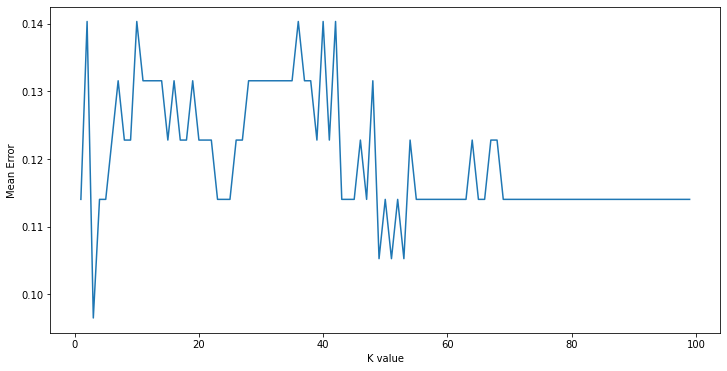

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

error = []

print(len(X_train))

# i 가 1 일때 하나 틀림
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
#     print(pred_i)
    error.append(np.mean(pred_i != Y_test))
    
error = np.array(error)
print(error)
print(error.argmin()+1)

plt.figure(figsize=(12,6))
plt.plot(range(1,100), error)
plt.xlabel("K value")
plt.ylabel("Mean Error")

90.35 % 


<Figure size 432x288 with 0 Axes>

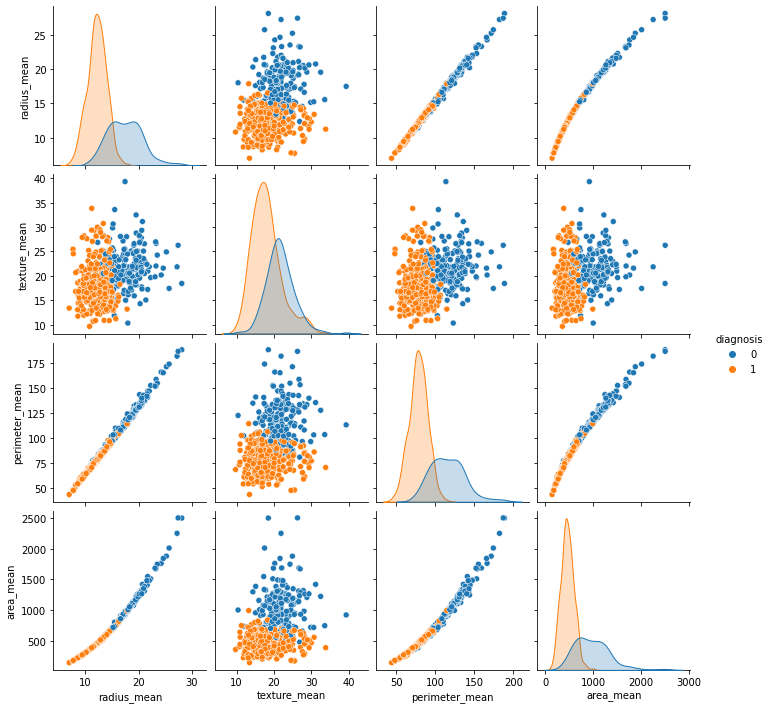

In [73]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred) * 100
print(str(round(accuracy,2)) + ' % ')




plt.figure()
# print(df.sample(10))

sns.pairplot(df, hue = "diagnosis")